**Pidilite Data Science Internship**  
**Problem Statement:** Predict whether a customer will purchase from the store, given data about customer’s information and past behaviour.  
**Work By:** Vishnu S Reddy  
**Email:** vishnusreddy007@gmail.com  
**Number:** 9742914197

## EDA

In [1]:
# Importing all the required libraries
import pandas as pd
import numpy as np

In [2]:
# Loading the dataset
df = pd.read_csv("data/train.csv")

In [3]:
# Make all empty and blank spaces as NaN
df = df.replace(r'^\s*$', np.nan, regex=True)

In [7]:
#Finding the number of values in each
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ID               150000 non-null  int64 
 1   STATE            148158 non-null  object
 2   AGE              150000 non-null  int64 
 3   OCCUPATION       107223 non-null  object
 4   INCOME_GROUP     146563 non-null  object
 5   CUSTOMER_SINCE   150000 non-null  int64 
 6   LOYALTY_PROGRAM  132176 non-null  object
 7   PAST_PURCHASE    150000 non-null  int64 
 8   PURCHASE         150000 non-null  object
dtypes: int64(4), object(5)
memory usage: 10.3+ MB


In [8]:
# Finding the number of null values in each of the columns
df.isnull().sum()

ID                     0
STATE               1842
AGE                    0
OCCUPATION         42777
INCOME_GROUP        3437
CUSTOMER_SINCE         0
LOYALTY_PROGRAM    17824
PAST_PURCHASE          0
PURCHASE               0
dtype: int64

We can see that all the null values are categorical. Most of the NaN values are from the columns occupation and these account for close to 1/3rd of the entire column. Most would predict that it would be best to drop this column entirely because it has such a high quantity of missing values. 

Let's try to keep the NaNs in the OCCUPATION column as a field called 'U' which stands for unknown.

In [9]:
#Filling with mode for the other columns and with a new category for occupation
df['STATE'].fillna(df['STATE'].mode()[0], inplace=True)
df['OCCUPATION'].fillna('U1', inplace=True)
df['INCOME_GROUP'].fillna(df['INCOME_GROUP'].mode()[0], inplace=True)
df['LOYALTY_PROGRAM'].fillna('U2', inplace=True)

### Checking for Outliers in the data

In [10]:
# Importing the library for this task
import seaborn as sns

<AxesSubplot:xlabel='PAST_PURCHASE'>

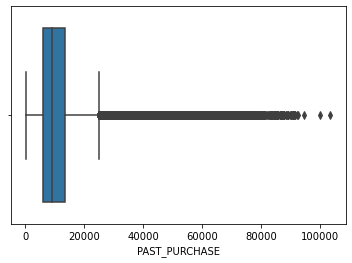

In [11]:
sns.boxplot(data=df,x=df['PAST_PURCHASE'])

We can see from this that this column called PAST_PURCHASE has a lot of outliers. We need to remove this or the classification model built would not be very accurate. 

In [12]:
# Importing the library for this task
from scipy import stats

In [13]:
df = df[(np.abs(stats.zscore(df['PAST_PURCHASE'])) < 3)]

<AxesSubplot:xlabel='PAST_PURCHASE'>

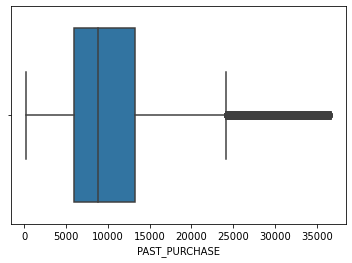

In [14]:
sns.boxplot(data=df,x=df['PAST_PURCHASE'])

We have managed to considerable remove the outliers from the data. 

## Visualizations to understand the data

With this plot let's try to understand the customer base that we would have. 

In [19]:
# Importing the libraries required 
import matplotlib.pyplot as plt

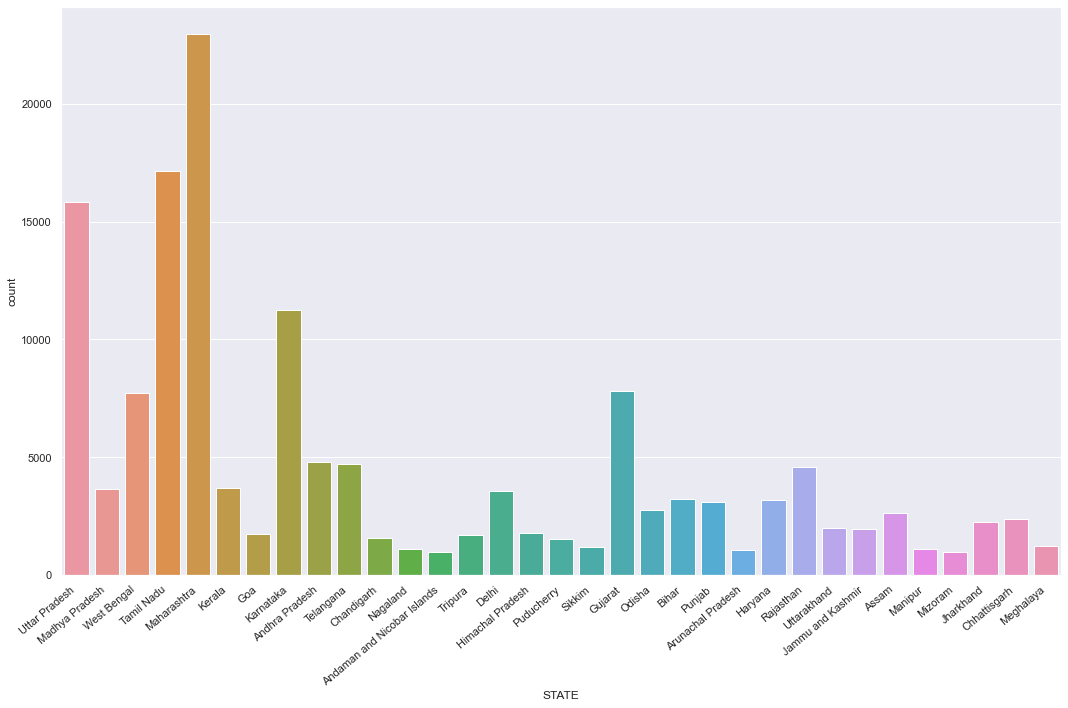

In [22]:
plt.figure(figsize=(15,10))
ax = sns.countplot(x ='STATE', data = df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

We can see that majority of the orders are from Maharashtra, Tamil Nadu, Uttar Pradesh, and Karnataka. 

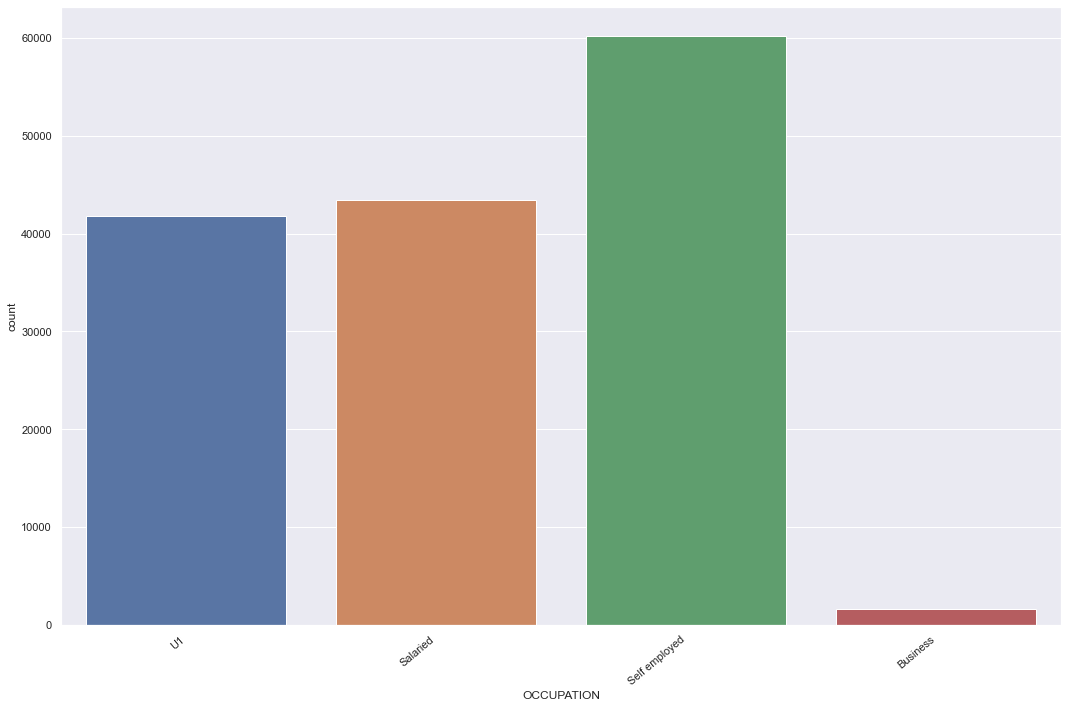

In [23]:
plt.figure(figsize=(15,10)) # this creates a figure 8 inch wide, 4 inch high
ax = sns.countplot(x ='OCCUPATION', data = df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='OCCUPATION', ylabel='Count'>

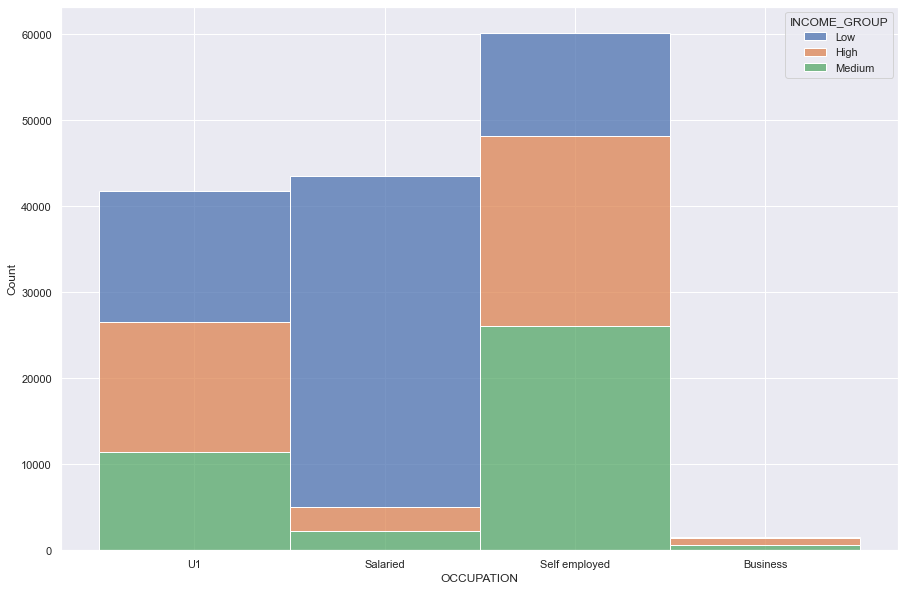

In [26]:
plt.figure(figsize=(15,10))

sns.histplot(binwidth=0.5, x="OCCUPATION", hue="INCOME_GROUP", data=df, stat="count", multiple="stack")

Here we can see the distribution of the occupation type and the income class. We can see that the newly created class U1 is very similar to the class Self Employed. But later when we build a model to classify, we see that our model perfomrs badly when we consider U1 to be the same as Self Employed.  

Another hypothesis to this class U1 is that we could consider that as the unemployed class. When we consider them as unemployed, our models perform significantly better. 

We can also see that the highest number of people from the low income category are from the salaried class and the lowest number are from the business class. 

<AxesSubplot:xlabel='INCOME_GROUP', ylabel='Count'>

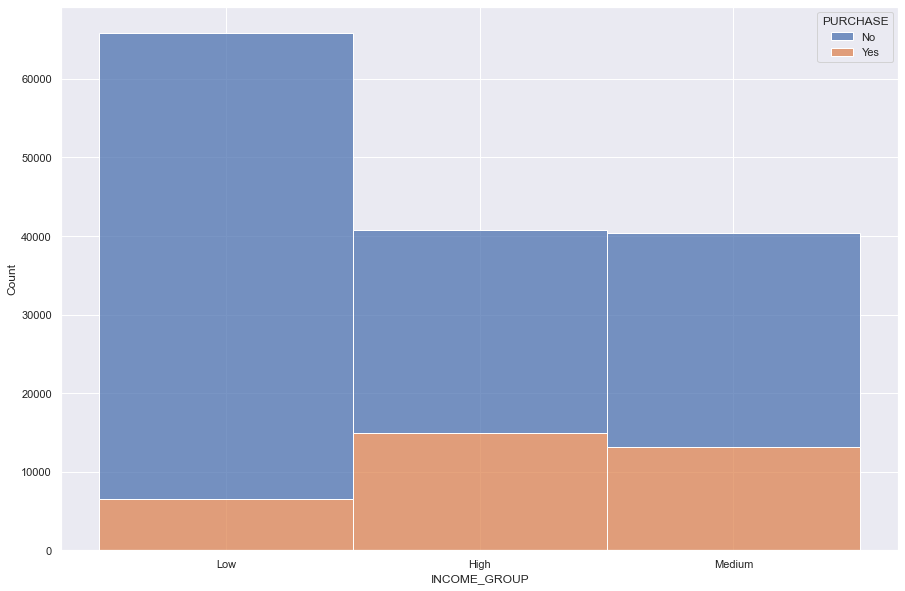

In [27]:
plt.figure(figsize=(15,10))

sns.histplot(binwidth=0.5, x="INCOME_GROUP", hue="PURCHASE", data=df, stat="count", multiple="stack")

We can see from the above group that a very high percentage of people from the low income group do not purchase products the next time. From this we can understand that it would make sense for the company to target high and medium income groups, or reduce the price of the products to target a much wider customer base. 

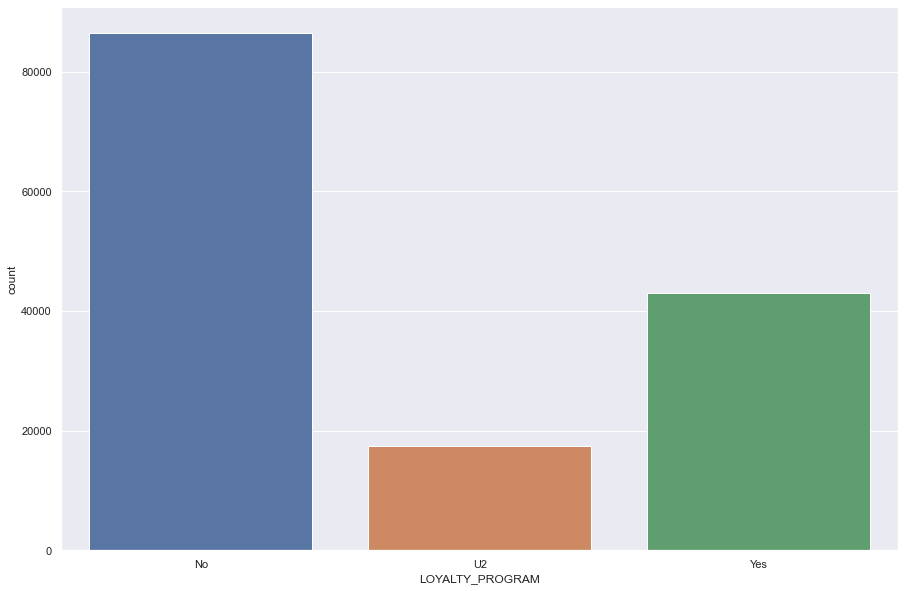

In [34]:
plt.figure(figsize=(15,10))
ax = sns.countplot(x ='LOYALTY_PROGRAM', data = df)
plt.show()

<AxesSubplot:xlabel='LOYALTY_PROGRAM', ylabel='Count'>

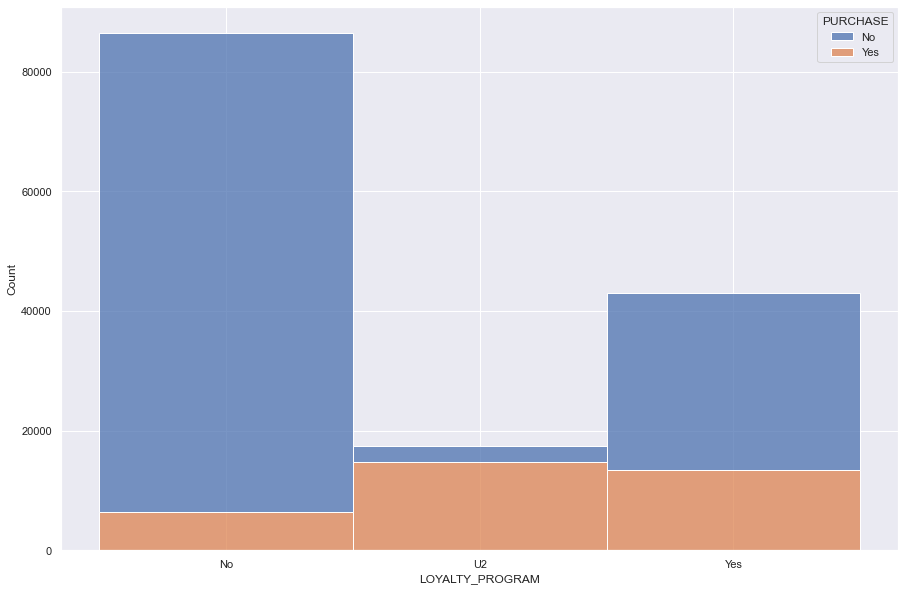

In [36]:
plt.figure(figsize=(15,10))

sns.histplot(binwidth=0.5, x="LOYALTY_PROGRAM", hue="PURCHASE", data=df, stat="count", multiple="stack")

We can see from the above graph that it is more likely that customers who have enrolled in the loyalty program are likely purchase products that those who have not. 

Another point to note here is that the category U2 might not not be either No or Yes. This is because we can see that the distribution is different from both of them. 

## Encoding and Prediction of Class

In [40]:
#Dropping the ID column 
df = df.drop(['ID'], axis = 1)

In [41]:
df['LOYALTY_PROGRAM'] = df['LOYALTY_PROGRAM'].map({'Yes': 1, 'No': 0})
df['PURCHASE'] = df['PURCHASE'].map({'Yes': 1, 'No': 0})

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
#Split the dataset into 70(train) - 30(test)
X = df.drop(['PURCHASE'], axis=1)
y = df['PURCHASE']

In [45]:
import category_encoders as ce
# Define catboost encoder
cbe_encoder = ce.cat_boost.CatBoostEncoder()
  
# Fit encoder and transform the features
cbe_encoder.fit(X, y)
train_cbe = cbe_encoder.transform(X)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(train_cbe, y, test_size = 0.3, random_state = 0)

In [47]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from xgboost import XGBClassifier
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("F1 Score: ",f1_score(y_test, predictions))

C:\Users\vishn\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:30:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 85.75%
F1 Score:  0.6352449500812631


In [48]:
from catboost import CatBoostClassifier
# fit model no training data
model = CatBoostClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("F1 Score: ",f1_score(y_test, predictions))

Learning rate set to 0.074517
0:	learn: 0.6326798	total: 169ms	remaining: 2m 48s
1:	learn: 0.5821793	total: 191ms	remaining: 1m 35s
2:	learn: 0.5416806	total: 216ms	remaining: 1m 11s
3:	learn: 0.5086178	total: 236ms	remaining: 58.8s
4:	learn: 0.4815715	total: 257ms	remaining: 51s
5:	learn: 0.4601731	total: 273ms	remaining: 45.2s
6:	learn: 0.4433561	total: 287ms	remaining: 40.7s
7:	learn: 0.4282056	total: 305ms	remaining: 37.8s
8:	learn: 0.4157943	total: 323ms	remaining: 35.6s
9:	learn: 0.4049774	total: 341ms	remaining: 33.8s
10:	learn: 0.3994197	total: 351ms	remaining: 31.6s
11:	learn: 0.3921361	total: 369ms	remaining: 30.4s
12:	learn: 0.3863769	total: 391ms	remaining: 29.7s
13:	learn: 0.3813497	total: 411ms	remaining: 29s
14:	learn: 0.3770558	total: 433ms	remaining: 28.4s
15:	learn: 0.3735237	total: 451ms	remaining: 27.7s
16:	learn: 0.3699239	total: 471ms	remaining: 27.3s
17:	learn: 0.3673625	total: 489ms	remaining: 26.7s
18:	learn: 0.3656476	total: 508ms	remaining: 26.3s
19:	learn: 0

In [49]:
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("F1 Score: ",f1_score(y_test, predictions))

Accuracy: 85.86%
F1 Score:  0.6373945914510032


In [50]:
from lightgbm import LGBMClassifier
# fit model no training data
model = LGBMClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("F1 Score: ",f1_score(y_test, predictions))

Accuracy: 85.87%
F1 Score:  0.6297154399097011
